In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data_frame = pd.read_csv('reaction_hospital.csv')

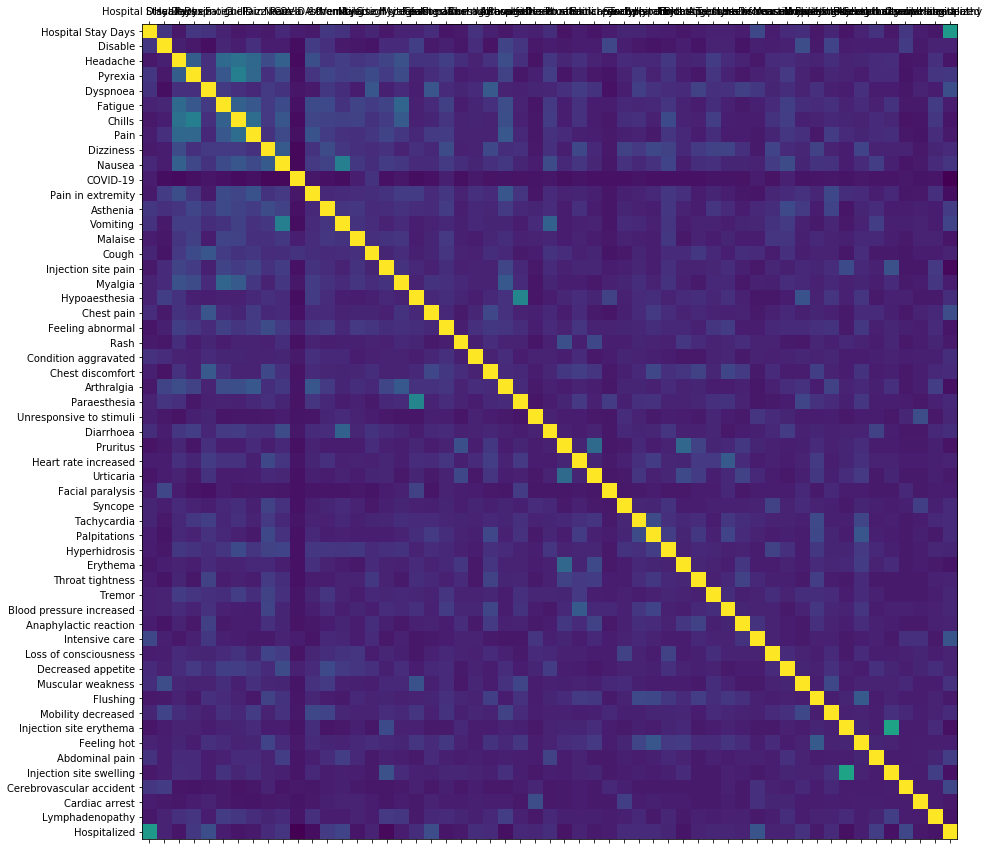

107.41% in training set
26.86% in test set


In [3]:
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

corr_heatmap(data_frame,15)

clm = data_frame.columns
feature_column_names = clm[:-1]

predicted_class_name = ['Hospitalized']

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42)
X, y = sm.fit_sample(X, y) 

split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())
rf_predict_train = rf_model.predict(X_train)
rf_accuracy_traindata = metrics.accuracy_score(y_train, rf_predict_train)

importances = rf_model.feature_importances_

y_pred = rf_model.predict(X_test)

print ("RF Training accuracy: {0:.2f}".format(rf_accuracy_traindata))
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

RF Training accuracy: 0.92
              precision    recall  f1-score   support

           1       0.91      0.83      0.87       694
           0       0.84      0.92      0.88       705

    accuracy                           0.87      1399
   macro avg       0.88      0.87      0.87      1399
weighted avg       0.88      0.87      0.87      1399

Test Accuracies
0.87
0.91
0.83
0.87
0.87
4.35
Feature importnaces:
0.5657433922553178
0.006340248635197874
0.014309351003202356
0.0168161204512999
0.022832323859110628
0.013239986806104673
0.009571228155421854
0.009689965855092415
0.014090306866359207
0.01044999290862389
0.018283540543622964
0.011390245893615281
0.010877747042359826
0.010978219566830882
0.007762554171359843
0.00806063927890677
0.010404654423619606
0.006338794499174129
0.005815999091572616
0.018152748080391343
0.006616778023039842
0.0061085094872773684
0.007112930291274734
0.006364585046970311
0.005951544221847374
0.005276006993061084
0.00799770382522549
0.0060646969732837

In [5]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

lgbm = lgb.LGBMClassifier(random_state = 42)
lgbm.fit(X_train, y_train.ravel())

y_t = lgbm.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

importances = lgbm.feature_importances_

train_acc = metrics.accuracy_score(y_train, y_t)

print ("LGBM Training accuracy: {0:.2f}".format(train_acc))

# predict
y_pred = lgbm.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

print ("Confusion Matrix")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

LGBM Training accuracy: 0.89
Confusion Matrix
[[559 135]
 [ 41 664]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.81      0.86       694
           0       0.83      0.94      0.88       705

    accuracy                           0.87      1399
   macro avg       0.88      0.87      0.87      1399
weighted avg       0.88      0.87      0.87      1399

Test Accuracies
0.87
0.93
0.81
0.86
0.87
4.35
Feature importnaces:
86
51
129
178
83
142
105
82
119
94
58
94
93
77
68
43
42
47
60
50
44
60
20
51
65
29
35
44
43
28
43
24
45
20
52
53
54
44
60
30
15
52
50
32
34
40
32
32
54
13
17
31
43
10


In [6]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
clf = svm.SVC(kernel='linear', random_state=42)

clf.fit(X_train, y_train)
svm_predict_train = clf.predict(X_train)

#get accuracy
svm_train_accuracy = metrics.accuracy_score(y_train, svm_predict_train)

#print accuracy
print ("SVM training Accuracy: {0:.2f}".format(svm_train_accuracy))

importances = clf.coef_[0]

y_pred = clf.predict(X_test)

print ("Confusion Matrix for SVM")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))


y_pred = np.where(y_pred > 0.5, 1, 0)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

SVM training Accuracy: 0.84
Confusion Matrix for SVM
[[504 190]
 [ 16 689]]
Classification Report

              precision    recall  f1-score   support

           1       0.97      0.73      0.83       694
           0       0.78      0.98      0.87       705

    accuracy                           0.85      1399
   macro avg       0.88      0.85      0.85      1399
weighted avg       0.88      0.85      0.85      1399

Test Accuracies
0.85
0.97
0.73
0.83
0.85
5.09
Feature importnaces:
5.681789187831271
-0.028515253606286706
-0.05504138453719065
0.05843818742500417
0.10746441883762259
-0.01859126265088662
-0.03604447543345657
-0.030370935137767674
0.007175014067861696
0.028054899416577683
-2.9094858348344133e-05
-0.025946679991790234
0.03163367190078503
0.07108123847798709
-0.03386914990217349
-0.03280906739624534
-0.04861902220713432
-0.022676972943358464
-0.001784286994222839
0.3330311622610864
-0.009858225111337049
-0.015669506813665635
-1.6620792102628457e-05
-0.04725556792156737

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
dtc_predict_train = dtc_model.predict(X_train)

#get accuracy
dtc_accuracy = metrics.accuracy_score(y_train, dtc_predict_train)

#print accuracy
print ("DT training Accuracy: {0:.2f}".format(dtc_accuracy))

importances = dtc_model.feature_importances_

y_pred = dtc_model.predict(X_test)

print ("Confusion Matrix for Decision Tree")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

DT training Accuracy: 0.92
Confusion Matrix for Decision Tree
[[576 118]
 [ 90 615]]
Classification Report

              precision    recall  f1-score   support

           1       0.86      0.83      0.85       694
           0       0.84      0.87      0.86       705

    accuracy                           0.85      1399
   macro avg       0.85      0.85      0.85      1399
weighted avg       0.85      0.85      0.85      1399

Test Accuracies
0.85
0.86
0.83
0.85
0.85
5.14
Feature importnaces:
0.6396853772361915
0.0053454069380801375
0.018828946525100424
0.007973562551307762
0.01589559993052174
0.011892399288944078
0.007039902653619664
0.009999308527356037
0.01489386648841353
0.010459844525494047
0.007939945999004883
0.008932708729381377
0.005756850671873198
0.008453849614362375
0.0063726457997245875
0.008548467149053298
0.005393456784656591
0.007832476564557217
0.0031597556395733754
0.01376237876072245
0.003450844254212306
0.004347767174987069
0.004340004963351172
0.005517020799591

In [8]:
from xgboost import XGBClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predict_train = xgb_model.predict(X_train)
xgb_accuracy = metrics.accuracy_score(y_train, xgb_predict_train)

#print accuracy
print ("XGB training Accuracy: {0:.2f}".format(xgb_accuracy))


importances = xgb_model.feature_importances_

y_pred = xgb_model.predict(X_test)

print ("Confusion Matrix for XGBoost")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

XGB training Accuracy: 0.90
Confusion Matrix for XGBoost
[[560 134]
 [ 47 658]]
Classification Report

              precision    recall  f1-score   support

           1       0.92      0.81      0.86       694
           0       0.83      0.93      0.88       705

    accuracy                           0.87      1399
   macro avg       0.88      0.87      0.87      1399
weighted avg       0.88      0.87      0.87      1399

Test Accuracies
0.87
0.92
0.81
0.86
0.87
4.47
Feature importnaces:
0.7111658
0.005816916
0.005967563
0.0038381126
0.005585081
0.0034549765
0.005213379
0.0041473783
0.0034162987
0.0029113065
0.017968362
0.0105617205
0.004532479
0.007074785
0.008383537
0.0033844374
0.010938387
0.003468209
0.0022891236
0.013690175
0.0026387672
0.008326207
0.0018369049
0.0039464734
0.011181899
0.0023148893
0.0026683416
0.0023718951
0.0017607007
0.004377513
0.0027586364
0.001777149
0.005027249
0.0012221135
0.0014877483
0.0027994984
0.0031269232
0.003341919
0.0053567686
0.0031646737
0.0

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

# Create a RandomForestClassifier object
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1,
                                      subsample=1,max_features='sqrt', random_state=42)
baseline.fit(X_train, y_train)
gbm_predict_train = baseline.predict(X_train)
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

print ("GBM training Accuracy: {0:.2f}".format(gbm_accuracy))

importances = baseline.feature_importances_

y_pred = baseline.predict(X_test)

print ("Confusion Matrix for GBM")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report\n")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, y_pred, labels=[1, 0])))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print('Test Accuracies')
print ("{0:.2f}".format(test_acc))
print ("{0:.2f}".format(precision))
print ("{0:.2f}".format(recall))
print ("{0:.2f}".format(f1))
print ("{0:.2f}".format(auc))
print ("{0:.2f}".format(logloss))

print('Feature importnaces:')

for i in importances:
    print(i)

GBM training Accuracy: 0.86
Confusion Matrix for GBM
[[514 180]
 [ 22 683]]
Classification Report

              precision    recall  f1-score   support

           1       0.96      0.74      0.84       694
           0       0.79      0.97      0.87       705

    accuracy                           0.86      1399
   macro avg       0.88      0.85      0.85      1399
weighted avg       0.87      0.86      0.85      1399

Test Accuracies
0.86
0.96
0.74
0.84
0.85
4.99
Feature importnaces:
0.7955301225409189
0.0026644499697164458
0.007439914241114098
0.0044768504024720445
0.02125290749893115
0.002939144455894275
0.004800205178940688
0.0040717228706670236
0.0013189255171908694
0.0006332657763475015
0.013452766800850877
0.011973610035710116
0.0019125169024200447
0.008177733432977211
0.005164919550189283
0.0015335442789843944
0.00963003371039402
0.0012083166110082003
0.0001286630739394427
0.01750453472102376
0.001967309566724024
0.0042271924431550876
0.00025137608323504634
0.002386911352437

In [10]:
from sklearn.metrics import roc_curve

pred_prob1 = rf_model.predict_proba(X_test)
pred_prob2 = dtc_model.predict_proba(X_test)
pred_prob3 = xgb_model.predict_proba(X_test)
pred_prob4 = baseline.predict_proba(X_test)
pred_prob5 = clf.decision_function(X_test)
pred_prob6 = lgbm.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

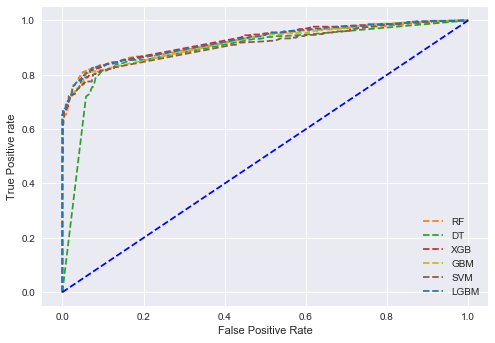

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#ff7f0e', label='RF')
plt.plot(fpr2, tpr2, linestyle='--',color='#2ca02c', label='DT')
plt.plot(fpr3, tpr3, linestyle='--',color='#d62728', label='XGB')
plt.plot(fpr4, tpr4, linestyle='--',color='#bcbd22', label='GBM')
plt.plot(fpr5, tpr5, linestyle='--',color='#8c564b', label='SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='#1f77b4', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();